In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import datetime as dt
from glob import glob

In [10]:
Youtube_US_df = pd.read_csv("USvideos.csv")
Youtube_US_df = Youtube_US_df.sort_values(by = ['views'],ascending=False)
Youtube_US_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38345,VYOjWnS4cMY,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38146,VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37935,VYOjWnS4cMY,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...


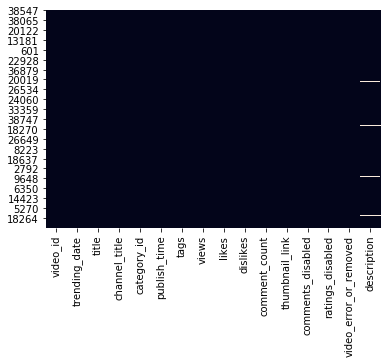

In [11]:
sns.heatmap(Youtube_US_df.isnull(), cbar=False)

In [32]:
Most_Viewed_Category = Youtube_US_df.groupby(['category_id']).sum()
Most_Viewed_Category = Most_Viewed_Category.sort_values(by = ['views'],ascending=False)
Most_Viewed_Category['category_id'] = Most_Viewed_Category.index
Most_Viewed_Category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_id
category_id,,,,,,,,
10,40132892190,1416838584,51179008,125296396,9.0,24.0,0.0,10
24,20604388195,530516491,42987663,73566498,196.0,30.0,8.0,24
1,7284156721,165997476,6075148,17887060,28.0,14.0,13.0,1
23,5117426208,216346746,7230391,22545582,2.0,0.0,0.0,23
22,4917191726,186615999,10187901,24778032,66.0,37.0,0.0,22
17,4404456673,98621211,5133551,11192155,28.0,17.0,2.0,17
26,4078545064,162880075,5473899,23149550,11.0,11.0,0.0,26
28,3487756816,82532638,4548402,11989926,90.0,16.0,0.0,28
20,2141218625,69038284,9184466,14740713,8.0,0.0,0.0,20


In [8]:
def category_dict_maker(js):
    items = js['items']
    item_id = []
    item_snippet_title = []
    for item in items:
        item_id.append(item['id']) 
        item_snippet_title.append(str(item['snippet']['title']))
    item_dict = dict(zip(item_id, item_snippet_title))
    return(item_dict)

us_dict = category_dict_maker('US_category_id.json')

def category_maker(value):
    for key in brit_dict:
        if str(value) == key:
            return (brit_dict[key])
        else:
            continue

def cat_applier(df):
    df['category'] = df.category_id.apply(func=category_maker)
    df.category = df.category.astype('category')
    return df.drop(columns=['category_id'])


TypeError: string indices must be integers

In [7]:
#Creating list of filenames
csv_files = glob('../*.csv')
json_files = glob('../*.json')

#Loading files into variables
df_list = list(map(lambda z: pd.read_csv(z,index_col='video_id'),csv_files))
britain_js, germany_js, canada_js, france_js, usa_js = list(map(lambda a: json.load(open(a,'r')),json_files))

ValueError: Index video_id invalid

In [6]:
csv_files

[]

In [ ]:
def category_dict_maker(js):
    items = js['items']
    item_id = []
    item_snippet_title = []
    for item in items:
        item_id.append(item['id']) 
        item_snippet_title.append(str(item['snippet']['title']))
    item_dict = dict(zip(item_id, item_snippet_title))
    return(item_dict)

brit_dict = category_dict_maker(britain_js)

def category_maker(value):
    for key in brit_dict:
        if str(value) == key:
            return (brit_dict[key])
        else:
            continue

def cat_applier(df):
    df['category'] = df.category_id.apply(func=category_maker)
    df.category = df.category.astype('category')
    return df.drop(columns=['category_id'])

df_list3 = list(map(cat_applier, df_list2))    
df_list3[0].head()